In [1]:
import pandas as pd
import os

# Датасет собран 2020-07-01

In [2]:
df = pd.read_csv('./hw linreg/bmw.csv')
df['car_maker'] = 'bmw'
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_maker
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0,bmw
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0,bmw
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0,bmw
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5,bmw
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0,bmw
...,...,...,...,...,...,...,...,...,...,...
10776,X3,2016,19000,Automatic,40818,Diesel,150,54.3,2.0,bmw
10777,5 Series,2016,14600,Automatic,42947,Diesel,125,60.1,2.0,bmw
10778,3 Series,2017,13100,Manual,25468,Petrol,200,42.8,2.0,bmw
10779,1 Series,2014,9930,Automatic,45000,Diesel,30,64.2,2.0,bmw


In [3]:
for i in ['vw.csv','audi.csv','toyota.csv','ford.csv','skoda.csv','merc.csv']:
    d = pd.read_csv('./hw linreg/'+i)
    d['car_maker'] = i.split('.')[0]
    df = df.append(d)
        

In [4]:
df.car_maker = df.car_maker.apply(lambda x: 'mercedes' if x == 'merc' else x)

In [5]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_maker
13114,C Class,2020,35999,Automatic,500,Diesel,145,55.4,2.0,mercedes
13115,B Class,2020,24699,Automatic,2500,Diesel,145,55.4,2.0,mercedes
13116,GLC Class,2019,30999,Automatic,11612,Diesel,145,41.5,2.1,mercedes
13117,CLS Class,2019,37990,Automatic,2426,Diesel,145,45.6,2.0,mercedes
13118,S Class,2019,54999,Automatic,2075,Diesel,145,52.3,2.9,mercedes


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
# Перемешаем данные и отделим целевую переменную от предикторов
data = shuffle(df, random_state = 123)

In [7]:
Y = data['price']
X = data.drop(['price'], 1)

In [8]:
X

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,car_maker
1333,Golf,2016,Semi-Auto,37474,Diesel,30,62.8,2.0,vw
581,A1,2016,Manual,31147,Petrol,30,56.5,1.4,audi
900,Superb,2017,Manual,42033,Diesel,0,76.4,1.6,skoda
6423,Passat,2016,Automatic,32555,Diesel,30,61.4,2.0,vw
9404,E Class,2016,Semi-Auto,42255,Diesel,20,72.4,2.0,mercedes
...,...,...,...,...,...,...,...,...,...
1897,Fabia,2015,Manual,29426,Petrol,20,60.1,1.2,skoda
95,Fabia,2017,Manual,32487,Petrol,150,60.1,1.2,skoda
6949,Polo,2018,Manual,7327,Petrol,145,60.1,1.0,vw
2092,A1,2017,Manual,21796,Petrol,30,56.5,1.4,audi


In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, 
            stratify = X[['car_maker']], 
            random_state = 123)

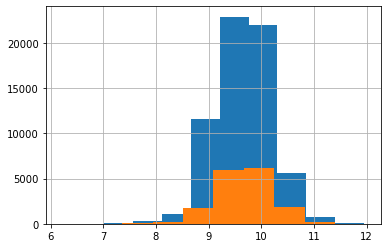

In [11]:
import numpy as np
np.log(Y_train).hist()
np.log(Y_test).hist()

In [12]:
from scipy import stats
stats.ks_2samp(Y_train,Y_test)

KstestResult(statistic=0.006103228204969335, pvalue=0.7196261970892843)

In [13]:
stats.mannwhitneyu(Y_train,Y_test)

MannwhitneyuResult(statistic=519935631.5, pvalue=0.35292964804138194)

In [36]:
X_test['id'] = np.arange(X_test.shape[0])

<ipython-input-36-ba99dced9caa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['id'] = np.arange(X_test.shape[0])


In [37]:
X_test = X_test.reset_index(drop =True).copy()

In [38]:
X_test

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,car_maker,id
0,C-MAX,2017,Manual,26805,Diesel,145,68.9,1.5,ford,0
1,1 Series,2017,Manual,24104,Petrol,125,53.3,1.5,bmw,1
2,T-Cross,2019,Manual,4899,Petrol,145,47.9,1.0,vw,2
3,A1,2019,Automatic,7000,Petrol,145,47.1,1.0,audi,3
4,Yaris,2016,Automatic,35588,Hybrid,0,86.0,1.5,toyota,4
...,...,...,...,...,...,...,...,...,...,...
16134,1 Series,2019,Semi-Auto,6581,Diesel,145,67.3,2.0,bmw,16134
16135,1 Series,2019,Automatic,5444,Diesel,145,51.4,2.0,bmw,16135
16136,Aygo,2018,Automatic,15295,Petrol,145,56.5,1.0,toyota,16136
16137,Kuga,2016,Manual,12290,Diesel,150,54.3,2.0,ford,16137


In [21]:
X_test.to_csv('linreg_test.csv')
X_train.to_csv('linreg_train.csv')
Y_train.to_csv('linreg_y_train.csv')
.reset_index(drop = True).to_csv('linreg_y_test.csv', index = False)

In [25]:
Y_train['id'] = np.arange(X_test.shape[0])

In [28]:
answer = pd.DataFrame(Y_test)

In [29]:
answer['id']=np.arange(X_test.shape[0])

In [31]:
answer.to_csv('linreg_answers.csv')

# Две модели без выбросов

In [104]:
X_train.shape, X_test.shape

((64556, 9), (16139, 10))

In [105]:
XX = pd.concat([X_train, X_test], axis = 0)

XX = pd.get_dummies(XX, 
                                  prefix = ['year','fuelType','transmission','model'], 
                                  columns = ['year','fuelType','transmission','model'],       
                                  drop_first = False)

In [106]:
new_train = XX.iloc[:64556]
new_test = XX.iloc[64556:]

In [107]:
premium = new_train[new_train.car_maker.isin(['mercedes','audi','bmw'])].drop('id', axis = 1).copy()
standard = new_train[~new_train.car_maker.isin(['mercedes','audi','bmw'])].drop('id', axis = 1).copy()

y_premium = Y_train[new_train.car_maker.isin(['mercedes','audi','bmw'])].copy()
y_standard = Y_train[~new_train.car_maker.isin(['mercedes','audi','bmw'])].copy()

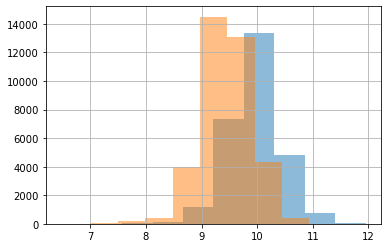

In [108]:
np.log(y_premium).hist(alpha = 0.5)
np.log(y_standard).hist(alpha = 0.5)

# Отпилим выбросы

In [109]:
def get_Q1_Q3_IDR(data, perem):
    Q1 = data[perem].quantile(0.25)
    Q3 = data[perem].quantile(0.75)
    IQR = Q3 - Q1
    Q1_IQR = Q1 - 1.5 * IQR
    Q3_IQR = Q3 + 1.5 * IQR

    print("Q1 = {s[0]}\n\
Q3 = {s[1]}\n\
IQR = {s[2]}\n\
Q1 - 1.5 IQR = {s[3]}\n\
Q3 + 1.5 IQR = {s[4]}".format(s = [Q1, Q3, IQR, Q1_IQR, Q3_IQR]))
    
    return (Q1_IQR, Q3_IQR)

In [110]:
def del_outliers(data, left, right, perem):
    return data[(data[perem] > left) & (data[perem] < right)]

In [111]:
# premium = pd.concat([premium,y_premium], axis = 1).copy()
# standard = pd.concat([standard,y_standard], axis = 1).copy()

In [112]:
premium['log_price'] = np.log(y_premium)
standard['log_price'] = np.log(y_standard)

In [113]:
Q1_premium, Q3_premium = get_Q1_Q3_IDR(premium,'log_price')

Q1 = 9.679812608592298
Q3 = 10.250581747317963
IQR = 0.5707691387256641
Q1 - 1.5 IQR = 8.823658900503801
Q3 + 1.5 IQR = 11.106735455406458


In [114]:
Q1_standard, Q3_standard = get_Q1_Q3_IDR(standard,'log_price')

Q1 = 9.158520623246385
Q3 = 9.769956159911606
IQR = 0.6114355366652209
Q1 - 1.5 IQR = 8.241367318248553
Q3 + 1.5 IQR = 10.687109464909437


In [115]:
# prem_train = premium[(premium.log_price<=Q3_premium)&(premium.log_price>=Q1_premium)]
# standard_train = standard[(standard.log_price<=Q3_standard)&(standard.log_price>=Q1_standard)]



In [116]:
prem_train = premium.copy()
standard_train = standard.copy()

In [117]:
standard_train = pd.get_dummies(standard_train, 
                                  prefix = ['car_maker'], 
                                  columns = ['car_maker'],       
                                  drop_first = False)

prem_train = pd.get_dummies(prem_train, 
                                  prefix = ['car_maker'], 
                                  columns = ['car_maker'],       
                                  drop_first = False)

In [118]:
indices = np.array(new_test.car_maker.isin(['mercedes','audi','bmw']))

In [119]:
new_test_prem = new_test[new_test.car_maker.isin(['mercedes','audi','bmw'])].copy()
new_test_standard = new_test[~new_test.car_maker.isin(['mercedes','audi','bmw'])].copy()

y_premium_test = Y_test[indices].copy()
y_standard_test = Y_test[~indices].copy()

In [120]:
new_test_prem = pd.get_dummies(new_test_prem, 
                                  prefix = ['car_maker'], 
                                  columns = ['car_maker'],       
                                  drop_first = False)

new_test_standard = pd.get_dummies(new_test_standard, 
                                  prefix = ['car_maker'], 
                                  columns = ['car_maker'],       
                                  drop_first = False)

In [121]:
y_standard_test.shape

(9225,)

# Шкалируем

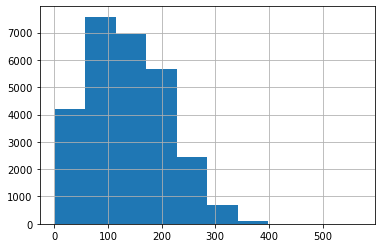

In [122]:
np.sqrt(prem_train['mileage']).hist()

In [123]:
new_test_prem['mileage'] = np.sqrt(new_test_prem['mileage'])
new_test_standard['mileage'] = np.sqrt(new_test_standard['mileage'])

prem_train['mileage'] = np.sqrt(prem_train['mileage'])
standard_train['mileage'] = np.sqrt(standard_train['mileage'])

In [124]:
from sklearn.preprocessing import StandardScaler
f = StandardScaler()
f.fit(prem_train[['mileage','tax','mpg','engineSize']].values)
scaled_features = f.transform(prem_train[['mileage','tax','mpg','engineSize']].values)
scaled_features_df = pd.DataFrame(scaled_features, index = prem_train.index, columns = prem_train[['mileage','tax','mpg','engineSize']].columns)



In [125]:
xx = prem_train.drop(['mileage','tax','mpg','engineSize'], axis = 1)
prem_train = pd.concat([xx, scaled_features_df], axis=1)

In [126]:
scaled_features = f.transform(new_test_prem[['mileage','tax','mpg','engineSize']].values)
scaled_features_df = pd.DataFrame(scaled_features, index = new_test_prem.index, columns = new_test_prem[['mileage','tax','mpg','engineSize']].columns)
xx = new_test_prem.drop(['mileage','tax','mpg','engineSize'], axis = 1)
new_test_prem = pd.concat([xx, scaled_features_df], axis=1)

In [127]:
f.fit(standard_train[['mileage','tax','mpg','engineSize']].values)
scaled_features = f.transform(standard_train[['mileage','tax','mpg','engineSize']].values)
scaled_features_df = pd.DataFrame(scaled_features, index = standard_train.index, columns = standard_train[['mileage','tax','mpg','engineSize']].columns)
xx = standard_train.drop(['mileage','tax','mpg','engineSize'], axis = 1)
standard_train = pd.concat([xx, scaled_features_df], axis=1)



In [128]:
scaled_features = f.transform(new_test_standard[['mileage','tax','mpg','engineSize']].values)
scaled_features_df = pd.DataFrame(scaled_features, index = new_test_standard.index, columns = new_test_standard[['mileage','tax','mpg','engineSize']].columns)
xx = new_test_standard.drop(['mileage','tax','mpg','engineSize'], axis = 1)
new_test_standard = pd.concat([xx, scaled_features_df], axis=1)

In [129]:
# new_test_standard.drop('id',axis = 1).shape

In [130]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, metrics
from sklearn.metrics import mean_absolute_error as mae

In [131]:
f2 = linear_model.Ridge(alpha = 1.0)
f4 = linear_model.Ridge(alpha = 1.0)

In [132]:
f2.fit(prem_train.drop(['log_price'],axis=1),prem_train['log_price'])
f4.fit(standard_train.drop(['log_price'],axis=1),standard_train['log_price'])

Ridge()

In [133]:
mae(np.exp(f4.predict(standard_train.drop('log_price',axis=1))),np.exp(standard_train['log_price']))

1327.5123994466862

In [134]:
set(prem_train.columns).difference(set(new_test_prem.columns))

{'log_price'}

In [135]:
standard_train.drop('log_price',axis=1).shape

(36902, 201)

In [136]:
new_test_prem.drop('id',axis = 1).shape

(6914, 200)

In [137]:
mae(np.exp(f2.predict(new_test_prem.drop('id',axis = 1))),y_premium_test)

2398.779463465689

In [138]:
mae(np.exp(f4.predict(new_test_standard.drop('id',axis = 1))),y_standard_test)

1322.4490852594452

In [139]:
prem = np.exp(f2.predict(new_test_prem.drop('id',axis = 1)))
stan = np.exp(f4.predict(new_test_standard.drop('id',axis = 1)))

In [140]:
mae(np.hstack([prem,stan]), np.hstack([y_premium_test,y_standard_test]))

1783.5525139054564

In [145]:
predicted = pd.DataFrame(np.hstack([prem,stan]))

In [148]:
predicted.columns = ['price']

In [153]:
predicted['id']= np.int32(np.hstack([new_test_prem['id'],new_test_standard['id']]))

In [155]:
predicted.sort_values(by='id')

,price,id
6914,10147.844516,0
0,13859.620942,1
6915,18015.946237,2
1,19539.249347,3
6916,10562.898871,4
...,...,...
6912,22096.296054,16134
6913,23010.198783,16135
16136,9176.015889,16136
16137,14965.748009,16137


In [156]:
predicted.sort_values(by='id').to_csv('my_answer.csv')

In [ ]:
pred_test = f5.predict(X_test)
rmse_Test = np.sqrt(metrics.mean_squared_error(np.log(Y_test), pred_test))
r2_Test = metrics.r2_score(np.sqrt(Y_test), pred_test)
rmse_Test, r2_Test

In [290]:
pred_train = f2.predict(x_train)
pred_test = f2.predict(x_test)

rmse_train = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
r2_train = metrics.r2_score(y_train, pred_train)

rmse_train, r2_train

(3757.6059191236313, 0.8637201925310298)

In [291]:
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, pred_test))
r2_test = metrics.r2_score(y_test, pred_test)
rmse_test, r2_test

(3802.4651381951808, 0.8676586164356288)

In [292]:
from sklearn.ensemble import RandomForestRegressor

In [293]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [301]:
pred_train = f5.predict(x_train)
pred_test = f5.predict(x_test)

rmse_train = np.sqrt(metrics.mean_squared_error(y_train, pred_train))
r2_train = metrics.r2_score(y_train, pred_train)

rmse_train, r2_train

(3583.773952781711, 0.8760375171805396)

In [302]:
rmse_test = np.sqrt(metrics.mean_squared_error(y_test, pred_test))
r2_test = metrics.r2_score(y_test, pred_test)
rmse_test, r2_test

(3635.8669213354997, 0.8790011768047065)

In [303]:
pred_test = f5.predict(X_test)
rmse_Test = np.sqrt(metrics.mean_squared_error(Y_test, pred_test))
r2_Test = metrics.r2_score(Y_test, pred_test)
rmse_Test, r2_Test

(3777.1124706206583, 0.8677712694548965)

In [313]:
mae(Y_test, pred_test)

2321.355219117967

In [924]:
pd.read_csv('linreg_y_test.csv', sep = ';')

,price,id
0,"5167,9899",0
1,"8723,13",1
2,"6555,16999",2
3,"5370,20026",3
4,"853,10572",4
...,...,...
16134,"5402,2595",16134
16135,"8866,26989",16135
16136,"5278,1",16136
16137,"1696,11998",16137
